In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [84]:
data_path = 'depth_images/'

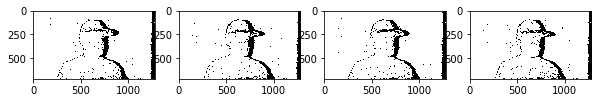

In [85]:
images = []
for filename in os.listdir(data_path):
    img = cv2.imread(data_path + filename, cv2.IMREAD_ANYDEPTH).astype(np.uint16)
    images.append(img)

brighter_images = []
for img in images:
    brighter_images.append(np.clip(img * 100, 0, 255))
    
fig, axes = plt.subplots(1, len(brighter_images), figsize=(10, 10))
for i in range(0, len(axes)):
    axes[i].imshow(brighter_images[i], cmap='gray')
plt.show()

In [87]:
histograms = []

# [300 - 65535]
def calc_hist(img):
    bins = np.zeros(2**16 - 300)
    rows = img.shape[0]
    cols = img.shape[1]
    for row in range(0, rows):
        for col in range(0, cols):
            if img[row, col] < 300:
                continue
            bins[img[row][col] - 300] += 1
    return bins

for i in range(0, len(images)):
    histograms.append(calc_hist(images[i]))

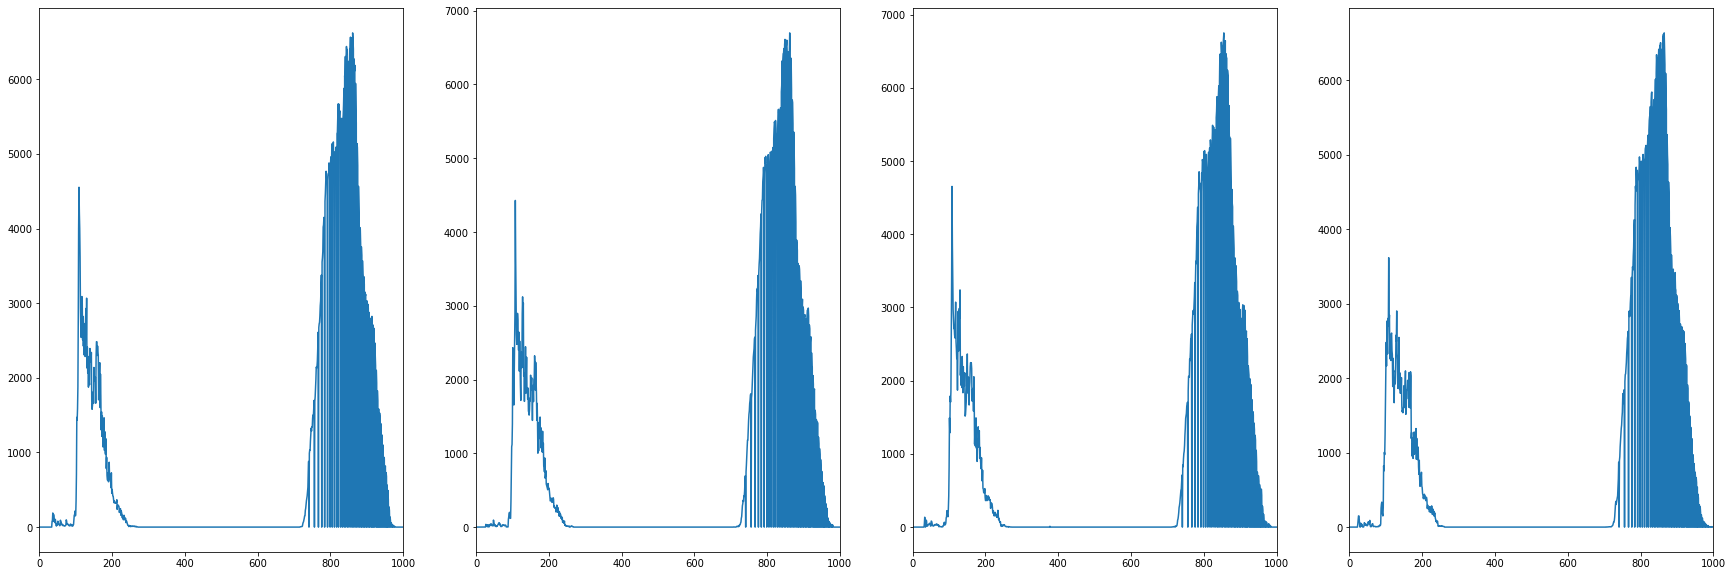

In [100]:
hists = []
for hist in histograms:
    hists.append(np.array(hist))

fig, axes = plt.subplots(1, len(hists), figsize=(30, 10))
for i in range(0, len(hists)):
    axes[i].set_xlim(0, 1000)
    axes[i].plot(hists[i])
plt.show()

In [104]:
shifted = np.zeros(2**16)

print(shifted.shape)
print(len(histograms[0]))

for i in range(0, len(histograms[0])):
    shifted[i + 300] += histograms[0][i]

(65536,)
65236


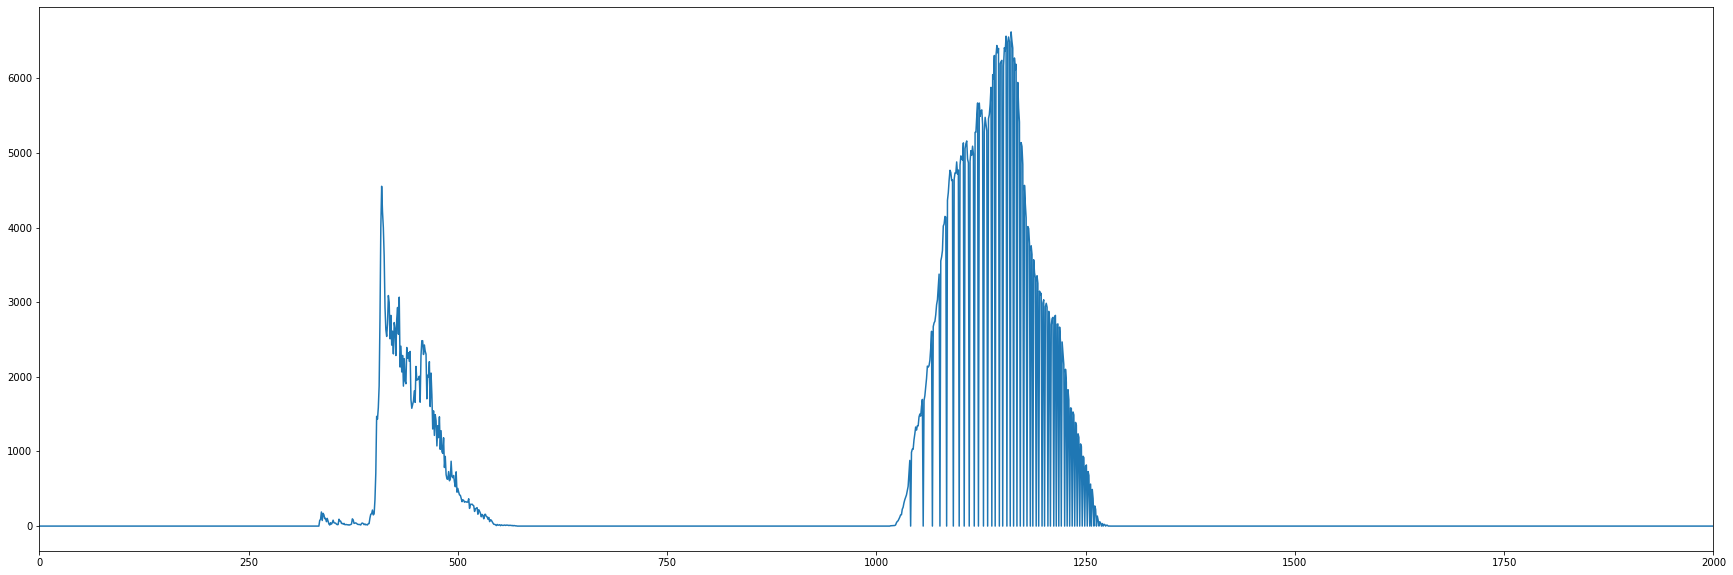

In [110]:
fig = plt.figure(figsize=(30, 10))
plt.xlim(0, 2000)
plt.plot(shifted)
plt.show()

In [113]:
# Note: Smooth it out
window_size = 10
kernel = np.ones(shape=(2 * window_size))
for i in range(0, shifted.shape[0]):
    summation = 0.0
    count = 0
    for j in range(-window_size, window_size):
        idx = i + j
        if idx < 0 or idx > shifted.shape[0] - window_size:
            continue
        summation += kernel[j] * shifted[i + j]
        count += 1
    shifted[i] = summation // (window_size * 2)

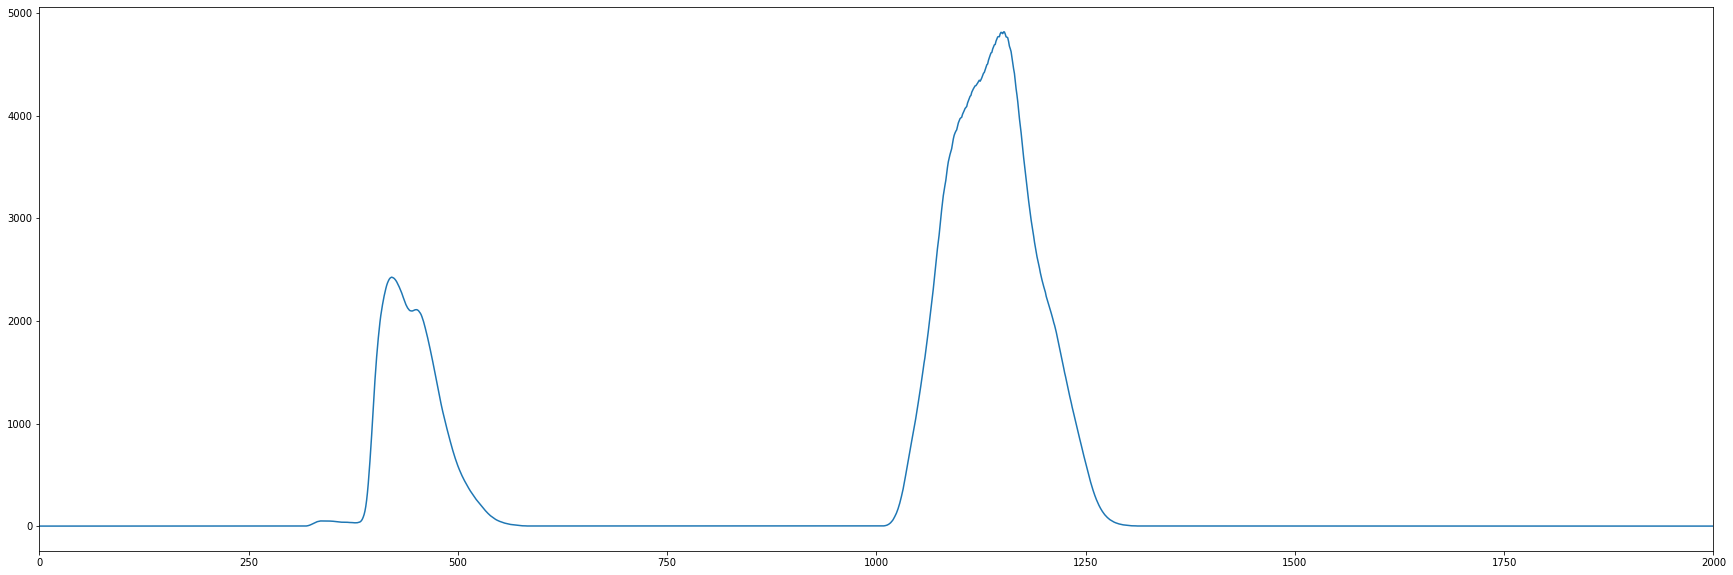

In [114]:
fig = plt.figure(figsize=(30, 10))
plt.xlim(0, 2000)
plt.plot(shifted)
plt.show()